## Analyse Click-through rates for hotels

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import statsmodels.formula.api as sm

### Part 1 – Clicked items investigation

In the resources section, you will find trivago_data_analysis_case_study_part_1.csv with information about items (hotels). Each row displays for each item, it's id, number of times it was displayed (impressions), number of click-outs (clicks), set of clicked displayed positions (0=first position), average impressed position, number of users and sessions with at least one impression. Only clicks and impressions from the first page results are considered.


In [2]:
# load data
data = pd.read_csv("part1.csv")
data.head()

,item_id,impressions,clicks,clicked_displayed_positions,avg_impressed_position,num_users,num_sessions
0,5040,40,5,20;9;12;10;12,11.83,22,23
1,5053,83,3,2;3;0,7.88,43,52
2,5094,54,6,0;0;0;2;1;2,4.72,30,36
3,5101,30,2,5;3,4.97,17,20
4,5105,24,1,18,9.08,8,11


#### Variables  
- item_id  
- impressions: number of times it was displayed
- clicks: number of click-outs 
- clicked_displayed_positions: set of clicked displayed positions (0=first position)
- average impressed position
- num_users: number of users with at least one impression.
- num_sessions: number of sessions with at least one impression. 

Only clicks and impressions from the first page results are considered.



#### 1. Calculate the CTR of each item. What is the overall avg CTR?

In [3]:
data["ctr"] = data["clicks"]/data["impressions"]

data.head()

,item_id,impressions,clicks,clicked_displayed_positions,avg_impressed_position,num_users,num_sessions,ctr
0,5040,40,5,20;9;12;10;12,11.83,22,23,0.125000
1,5053,83,3,2;3;0,7.88,43,52,0.036145
2,5094,54,6,0;0;0;2;1;2,4.72,30,36,0.111111
3,5101,30,2,5;3,4.97,17,20,0.066667
4,5105,24,1,18,9.08,8,11,0.041667


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Distribution of CTR')

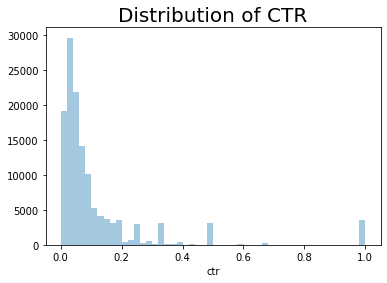

In [4]:
bins = np.linspace(data.ctr.min(), data.ctr.max(), 10)
hist = sns.distplot(data["ctr"],kde = False)
plt.title("Distribution of CTR",fontsize=20)

In [5]:
avg_ctr = data["ctr"].mean()
avg_ctr

0.11455705989500184

It can be observed that the distrubution of CTR is highly positive skewed with most of distribution spread between 0 and 0.2. The average CTR is 11.46%.

#### 2. What is the distribution of clicks among the top 25 positions? What is the share of the first positions? On how many positions are approx. Half of the click-outs made?

In [6]:
clicked_pos = pd.DataFrame(data.clicked_displayed_positions.str.split(';').tolist(), index=data.item_id).stack()
clicked_pos

item_id   
5040     0     20
         1      9
         2     12
         3     10
         4     12
5053     0      2
         1      3
         2      0
5094     0      0
         1      0
         2      0
         3      2
         4      1
         5      2
5101     0      5
         1      3
5105     0     18
5115     0      3
         1      6
5121     0      3
         1      1
         2    -11
         3      8
         4    -11
         5      8
         6      0
5130     0      0
         1      3
         2      1
         3      3
             ... 
7126034  0     10
7127118  0     23
7127252  0      1
7128110  0      0
7129782  0      8
7133194  0     12
7139930  0     21
7140036  0     13
7140702  0      1
         1      0
7140846  0      5
7140952  0      3
7141588  0      0
7141592  0      1
7146690  0     11
         1      2
7147642  0      2
7148296  0      6
         1     24
7148358  0    -11
7154028  0      0
7156784  0     21
         1     23
         2     15

In [7]:
# get the top 25 items with the highest clicks
clicked_pos_dist = clicked_pos.loc[:,1].sort_values().value_counts()
top25 = clicked_pos_dist[:25]

top25

0      18505
1       7693
-11     6352
2       5672
3       4555
4       3805
5       3402
6       3001
7       2629
8       2426
9       2248
10      2068
11      1836
12      1691
13      1552
14      1433
15      1364
16      1255
17      1174
18      1127
24      1092
19       993
20       981
21       912
23       867
dtype: int64

In [9]:
x_pos=top25.index.tolist()
x_pos

['0',
 '1',
 '-11',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '24',
 '19',
 '20',
 '21',
 '23']

Text(0.5, 1.0, 'Number of Clicks of Top 25 Positions')

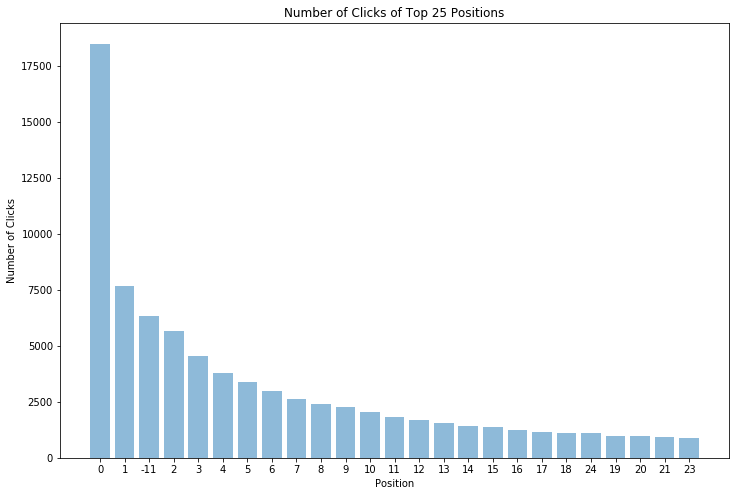

In [10]:
fig=plt.figure(figsize=[12,8])
plt.bar(x_pos, top25, align='center', alpha=0.5)
plt.xticks(x_pos)
plt.ylabel('Number of Clicks')
plt.xlabel('Position')
plt.title('Number of Clicks of Top 25 Positions')

In [11]:
# Calculate share of the first positions.
top_share = clicked_pos_dist[0]/clicked_pos_dist.sum()
top_share

0.2328375861895415

The pages in the front got more clicks, which makes sense as users start browsing from the first page. The first position is the fitst page with 18505 clicks, taking up 23.28% of total clicks.

In [12]:
## On how many positions are approx. Half of the click-outs made?
a=0
count = 0
total_clicks = clicked_pos_dist.sum()
half = total_clicks/2

for each in clicked_pos_dist:
    if a + each> half:
        a = a
    else:
        a = a+each
        count = count + 1

p50 = a/total_clicks
p50

0.49895565957018473

In [13]:
print("On the top " + str(count) + " most clicked positions are approximately half of the click-outs made.")

On the top 5 most clicked positions are approximately half of the click-outs made.


In [14]:
avg_impressed_position = data["avg_impressed_position"]

#### 3.Describe the relationship between the average displayed position and the clicked displayed position. What are your thoughts about the variance between the two?


In [248]:
avg_impressed_position = data["avg_impressed_position"]
avg_impressed_position.head()

0    11.83
1     7.88
2     4.72
3     4.97
4     9.08
Name: avg_impressed_position, dtype: float64

In [16]:
avg_clicked_pos = clicked_pos.astype("int").groupby("item_id").mean()

avg_clicked_pos.head()

item_id
5040    12.600000
5053     1.666667
5094     0.833333
5101     4.000000
5105    18.000000
dtype: float64

In [17]:
from scipy.stats.stats import pearsonr

pearsonr(avg_impressed_position,avg_clicked_pos)

(0.44693685061779775, 0.0)

In [251]:
avg_impressed_position_var= np.var(avg_impressed_position)
avg_clicked_pos_var = np.var(avg_clicked_pos)

print(avg_impressed_position_var,avg_clicked_pos_var)

16.697918352257176 39.04822434334606


The Pearson’s correlation coefficient is 0.45 with a p-value smaller than 0.  
The average displayed position and the clicked displayed position are significantly positively related to each other.  

#### 4. In the dataset, we provided you with the average displayed position. What can be wrong with using averages?

If an outlier exists in the dataset, it would affect the average and may be biased in terms of presenting a truthful respresentation of the majority. In the case, median would be better than mean.

### Part 2 – Session investigation

For this task, you now have some session level information. Take a look at the data in trivago_data_analysis_case_study_part_2.csv and get familiar with the structure. Each row corresponds to a click-out from a user and you can find basic information on the structure at the end of this document.



Describe the data set that you have received. Calculate the 5 most frequent values per column (with frequency). 
Can you find any suspicious results? If so, what are they?   
And how would you fix these for the analysis?  
Which search type has the lowest average displayed position? What is the best sorting order for this search type? Which search type should be excluded for a statistical reason?  
What are the top 10 “best” and “worst” performing items? Explain what metric you have chosen to evaluate the performance and why.  
Describe and visualise the relationship between the average displayed position and the CTR among the top 1000 most clicked items.  

### Column description

In the trivago_data_analysis_case_study_part2.csv file provides you with all the data needed to complete the second part of the Big Data Analyst case study.  
Dataset description: each row of the dataset corresponds to a click-out from a user.   

Columns:
- User_id: anonymized cookie id of the visitor
- Session_id: anonymized id of the session
- Clicked_item_id: id of the clicked hotel.
- Displayed_position: position, relative to the page, of the item into the list (0=first position)
- Page_num: cardinal number of the page where the clicked hotel was displayed (0=first page)
- Sort_order: categorization of the sorting order of the list (e.g. “sort by popularity”, “focus on rating”, etc)
- Search_type: categorization of the type of search (e.g. “city search”, “item search”, etc)
- Path_id: id of the location where the listed items are situated.
- Arrival_days: number of days from the date of the search and the date of the check- in.
- Departure_days: number of days from the date of the search and the date of the check-out.
- Traffic_type: categorization of the type of the traffic (e.g. “SEM”, “Branded”, etc) 
- Impressed_items_ids: ids of all the items which were displayed on the same page where the click-out happened. They are in the order of display.

#### 1. Describe the data set that you have received. Calculate the 5 most frequent values per column (with frequency). Can you find any suspicious results? If so, what are they? And how would you fix these for the analysis?

In [164]:
# load data
df = pd.read_csv("part2.csv")

df.head()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,user_id,session_id,clicked_item_id,displayed_position,page_num,sort_order,search_type,path_id,arrival_days,departure_days,traffic_type,impressed_item_ids
0,6216730024127027591,3.755630e+18,3390592.0,-11.0,0.0,12.0,2113.0,39693.0,3.0,4.0,2.0,128992;127920;132177;1107164;19389;3217646;123...
1,3540322805835307689,4.581411e+18,2393900.0,6.0,0.0,21.0,2113.0,35009.0,21.0,22.0,2.0,5169438;997421;76994;1376364;67654;68977;23939...
2,5439210126639293380,7.260244e+18,8285.0,0.0,0.0,12.0,2116.0,34390.0,301.0,302.0,2.0,8285;8284;78562;8243;1288434;61564;60293;15334...
3,3482625725900275142,3.013037e+18,148308.0,6.0,0.0,41.0,2113.0,41579.0,39.0,42.0,3.0,2196706;46431;1262783;148312;1478421;6171546;1...
4,6185636196804664137,1.463579e+18,4527530.0,0.0,0.0,12.0,2116.0,85724.0,48.0,49.0,2.0,4527530;149339;945921;1236133;1259540;1700445;...


In [165]:
df.shape

(1903796, 12)

In [166]:
df.describe()

,session_id,clicked_item_id,displayed_position,page_num,sort_order,search_type,path_id,arrival_days,departure_days,traffic_type
count,1.903795e+06,1.903795e+06,1.903795e+06,1.903795e+06,1.903795e+06,1.903795e+06,1.903795e+06,1.903795e+06,1.903795e+06,1.903795e+06
mean,4.599321e+18,1.151328e+06,4.255730e+00,2.710922e-01,1.031139e+02,2.113646e+03,8.224041e+04,5.741450e+01,-2.753361e+04,2.103141e+00
std,2.662867e+18,1.487240e+06,7.724735e+00,1.097410e+00,1.342582e+02,1.530549e+00,1.241438e+05,7.034603e+01,1.638114e+05,4.508134e-01
min,4.368929e+12,5.001000e+03,-1.100000e+01,0.000000e+00,0.000000e+00,2.100000e+03,0.000000e+00,-1.000000e+00,-1.000000e+06,1.000000e+00
25%,2.294853e+18,4.708000e+04,0.000000e+00,0.000000e+00,1.200000e+01,2.113000e+03,3.800900e+04,9.000000e+00,1.000000e+01,2.000000e+00
50%,4.593670e+18,4.810160e+05,2.000000e+00,0.000000e+00,1.200000e+01,2.113000e+03,4.060600e+04,2.700000e+01,2.700000e+01,2.000000e+00
75%,6.905452e+18,1.822887e+06,8.000000e+00,0.000000e+00,2.120000e+02,2.115000e+03,4.681400e+04,8.400000e+01,8.500000e+01,2.000000e+00
max,9.223365e+18,7.174984e+06,2.400000e+01,2.000000e+01,4.210000e+02,2.116000e+03,6.804240e+05,7.300000e+02,7.420000e+02,3.000000e+00


In [167]:
# Examine missing values
df.isna().sum()

user_id                0
session_id             1
clicked_item_id        1
displayed_position     1
page_num               1
sort_order             1
search_type            1
path_id                1
arrival_days           1
departure_days         1
traffic_type           1
impressed_item_ids     1
dtype: int64

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1903796 entries, 0 to 1903795
Data columns (total 12 columns):
user_id                object
session_id             float64
clicked_item_id        float64
displayed_position     float64
page_num               float64
sort_order             float64
search_type            float64
path_id                float64
arrival_days           float64
departure_days         float64
traffic_type           float64
impressed_item_ids     object
dtypes: float64(10), object(2)
memory usage: 174.3+ MB


In [169]:
# there is only one row that contains missing value, 
# due to big sample size dropping one row would not have big impact on the total dataset.
df = df.dropna(axis=0)
df.shape

(1903795, 12)

briefly format the dataframe.

In [170]:
df["impressed_item_ids"]=df["impressed_item_ids "]
df = df.drop("impressed_item_ids ",axis=1)
df.head()

,user_id,session_id,clicked_item_id,displayed_position,page_num,sort_order,search_type,path_id,arrival_days,departure_days,traffic_type,impressed_item_ids
0,6216730024127027591,3.755630e+18,3390592.0,-11.0,0.0,12.0,2113.0,39693.0,3.0,4.0,2.0,128992;127920;132177;1107164;19389;3217646;123...
1,3540322805835307689,4.581411e+18,2393900.0,6.0,0.0,21.0,2113.0,35009.0,21.0,22.0,2.0,5169438;997421;76994;1376364;67654;68977;23939...
2,5439210126639293380,7.260244e+18,8285.0,0.0,0.0,12.0,2116.0,34390.0,301.0,302.0,2.0,8285;8284;78562;8243;1288434;61564;60293;15334...
3,3482625725900275142,3.013037e+18,148308.0,6.0,0.0,41.0,2113.0,41579.0,39.0,42.0,3.0,2196706;46431;1262783;148312;1478421;6171546;1...
4,6185636196804664137,1.463579e+18,4527530.0,0.0,0.0,12.0,2116.0,85724.0,48.0,49.0,2.0,4527530;149339;945921;1236133;1259540;1700445;...


In [171]:
mode = df.mode()
mode

,user_id,session_id,clicked_item_id,displayed_position,page_num,sort_order,search_type,path_id,arrival_days,departure_days,traffic_type,impressed_item_ids
0,4509866267912745159,5.009065e+18,2834772.0,0.0,0.0,12.0,2113.0,38715.0,0.0,4.0,2.0,1455251;40899;4995818;40887;15854;40928;228246...


In [172]:
def top5(df,col):
    col=str(col)
    count = df[col].value_counts()
    
    return count.head(5)

In [173]:
cols = df.columns.drop(["user_id"]).tolist()
cols

['session_id',
 'clicked_item_id',
 'displayed_position',
 'page_num',
 'sort_order',
 'search_type',
 'path_id',
 'arrival_days',
 'departure_days',
 'traffic_type',
 'impressed_item_ids']

In [174]:
for col in cols:
    print(top5(df,col))

5.009065e+18    337
8.560570e+18    148
2.839951e+18    109
7.154740e+18     92
3.191225e+18     88
Name: session_id, dtype: int64
2834772.0    2869
1321090.0    2828
12624.0      2575
32940.0      2324
1455251.0    2297
Name: clicked_item_id, dtype: int64
 0.0     495014
 1.0     203090
-11.0    152437
 2.0     138789
 3.0     108490
Name: displayed_position, dtype: int64
0.0    1677391
1.0     124109
2.0      44578
3.0      21226
4.0      11857
Name: page_num, dtype: int64
12.0     1162269
312.0     283516
212.0     229803
412.0      94343
41.0       54259
Name: sort_order, dtype: int64
2113.0    928598
2116.0    375583
2111.0    230316
2115.0    194310
2114.0    174986
Name: search_type, dtype: int64
38715.0    138706
46814.0     41379
41579.0     36498
38961.0     31634
31965.0     30928
Name: path_id, dtype: int64
0.0    65863
3.0    63180
1.0    60910
4.0    54871
5.0    50279
Name: arrival_days, dtype: int64
 4.0          59506
 1.0          52780
-1000000.0    52530
 5.0       

By examining the top 5 most frequent values for each column, it can be observed that in variable "departure_days" the number -1000000 does not make sense. Since within -1000000, there are 52530 samples which is too big to be eliminated without affecting the overall insight. The distribution of the departure days is then examined.

In [175]:
x = df.departure_days.value_counts()
x = x.sort_index()
x

-1000000.0    52530
 0.0            265
 1.0          52780
 2.0          44105
 3.0          43034
 4.0          59506
 5.0          51982
 6.0          48879
 7.0          44781
 8.0          41252
 9.0          36211
 10.0         32743
 11.0         29313
 12.0         28089
 13.0         26433
 14.0         27037
 15.0         26364
 16.0         22884
 17.0         20486
 18.0         19033
 19.0         31727
 20.0         32092
 21.0         32107
 22.0         35603
 23.0         31811
 24.0         28078
 25.0         26211
 26.0         14077
 27.0         14366
 28.0         14319
              ...  
 504.0            1
 505.0            2
 506.0            2
 507.0            1
 508.0            1
 510.0            1
 512.0            1
 515.0            1
 519.0            1
 520.0            2
 521.0            2
 522.0            4
 526.0            3
 528.0            1
 533.0            1
 535.0            1
 536.0            3
 537.0            1
 538.0            3


It is observed that most of the distribution are within 10 days after the search. Whilst the first 15 days are all included in the data, logically, day 0 with 265 instances is too small as it is not uncommon for people to decide on searching for a hotel on a very short notice. Therefore, my judgement would be combine the -100000 data with day 0 data. Of course, the most accurate measure would be to confirm with the data provider.

In [176]:
df["departure_days"] = df["departure_days"].replace(-1000000,0)


In [177]:
x = df.departure_days.value_counts()
x = x.sort_index()
x

0.0      52795
1.0      52780
2.0      44105
3.0      43034
4.0      59506
5.0      51982
6.0      48879
7.0      44781
8.0      41252
9.0      36211
10.0     32743
11.0     29313
12.0     28089
13.0     26433
14.0     27037
15.0     26364
16.0     22884
17.0     20486
18.0     19033
19.0     31727
20.0     32092
21.0     32107
22.0     35603
23.0     31811
24.0     28078
25.0     26211
26.0     14077
27.0     14366
28.0     14319
29.0     14529
         ...  
504.0        1
505.0        2
506.0        2
507.0        1
508.0        1
510.0        1
512.0        1
515.0        1
519.0        1
520.0        2
521.0        2
522.0        4
526.0        3
528.0        1
533.0        1
535.0        1
536.0        3
537.0        1
538.0        3
542.0        3
545.0        1
547.0        1
549.0        2
557.0        1
567.0        2
580.0        3
715.0        1
724.0        1
737.0        3
742.0        1
Name: departure_days, Length: 518, dtype: int64

#### 2. Which search type has the lowest average displayed position? What is the best sorting order for this search type? Which search type should be excluded for a statistical reason?

In [178]:
search_type_pos = df.groupby("search_type")["displayed_position"].mean().sort_values(ascending=True)
search_type_pos

search_type
2116.0    1.372424
2100.0    2.500000
2114.0    3.805842
2113.0    4.890490
2115.0    5.346740
2111.0    5.819748
Name: displayed_position, dtype: float64

Type 2116 has the lowest average displayed position. Next its best sorting order is calculated.

In [179]:
sort_2116 = df[df["search_type"]==2116]
sort_2116.head()

,user_id,session_id,clicked_item_id,displayed_position,page_num,sort_order,search_type,path_id,arrival_days,departure_days,traffic_type,impressed_item_ids
2,5439210126639293380,7.260244e+18,8285.0,0.0,0.0,12.0,2116.0,34390.0,301.0,302.0,2.0,8285;8284;78562;8243;1288434;61564;60293;15334...
4,6185636196804664137,1.463579e+18,4527530.0,0.0,0.0,12.0,2116.0,85724.0,48.0,49.0,2.0,4527530;149339;945921;1236133;1259540;1700445;...
5,8400792661852651256,7.163416e+18,2378550.0,0.0,0.0,212.0,2116.0,382.0,6.0,7.0,1.0,2378550;2266990;1247594;4595264;2402454;477300...
7,1108080265867879700,6.163484e+18,131724.0,0.0,0.0,12.0,2116.0,50919.0,130.0,140.0,3.0,131724;1017138;39612;624571;2643984;2789918;98...
27,3326420326808079376,4.865805e+18,4001214.0,9.0,0.0,312.0,2116.0,490289.0,0.0,1.0,2.0,2550972;2048553;1146671;2546928;633186;3390554...


In [180]:
sort_2116 = sort_2116["sort_order"].value_counts()
sort_2116

12.0     278270
312.0     64087
21.0      17729
212.0      7449
412.0      4970
41.0       1679
112.0       988
32.0        224
0.0         187
Name: sort_order, dtype: int64

In [187]:
per = sort_2116/sort_2116.sum()
per

12.0     0.740901
312.0    0.170633
21.0     0.047204
212.0    0.019833
412.0    0.013233
41.0     0.004470
112.0    0.002631
32.0     0.000596
0.0      0.000498
Name: sort_order, dtype: float64

It shows that the sort order 12 is the best sorting order for the search type 2116 with the frequency of 74% out of all occurances.

In [103]:
search_type_count = df["search_type"].value_counts()
search_type_count 

2113.0    928598
2116.0    375583
2111.0    230316
2115.0    194310
2114.0    174986
2100.0         2
Name: search_type, dtype: int64

Looking at other search types, the item "2100" only has two observations which are too small compared to the overall sample. Therefore, it can be dropped to provide a better insight of the dataset.

In [188]:
df = df[df["search_type"]!=2100]
df["search_type"].value_counts()

2113.0    928598
2116.0    375583
2111.0    230316
2115.0    194310
2114.0    174986
Name: search_type, dtype: int64

#### 3. What are the top 10 “best” and “worst” performing items? Explain what metric you have chosen to evaluate the performance and why.

In [192]:
num_impressions = [len(x) for x in impressions]
num_impressions    

[23,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 9,
 25,
 25,
 8,
 17,
 25,
 19,
 25,
 25,
 16,
 25,
 25,
 25,
 15,
 9,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 17,
 25,
 25,
 25,
 25,
 21,
 25,
 25,
 25,
 14,
 25,
 25,
 25,
 10,
 20,
 25,
 25,
 25,
 25,
 25,
 15,
 25,
 25,
 25,
 25,
 25,
 2,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 24,
 25,
 25,
 25,
 25,
 25,
 6,
 25,
 25,
 12,
 25,
 22,
 25,
 10,
 25,
 25,
 25,
 22,
 2,
 25,
 25,
 11,
 7,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 13,
 25,
 25,
 25,
 25,
 25,
 14,
 25,
 25,
 25,
 22,
 25,
 25,
 25,
 25,
 25,
 25,
 7,
 25,
 25,
 18,
 25,
 25,
 25,
 25,
 25,
 25,
 5,
 25,
 25,
 25,
 25,
 25,
 25,
 20,
 25,
 25,
 25,
 3,
 25,
 5,
 25,
 25,
 25,
 25,
 19,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 24,
 25,
 25,
 25,
 25,
 25,
 25,
 20,
 25,
 25,
 25,
 25,
 20,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 1,
 25,
 25,
 15,
 25,
 6,
 25,
 25,
 22,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25

In [193]:
df["num_impressions"] = num_impressions
df.head()

,user_id,session_id,clicked_item_id,displayed_position,page_num,sort_order,search_type,path_id,arrival_days,departure_days,traffic_type,impressed_item_ids,num_impressions
0,6216730024127027591,3.755630e+18,3390592.0,-11.0,0.0,12.0,2113.0,39693.0,3.0,4.0,2.0,128992;127920;132177;1107164;19389;3217646;123...,23
1,3540322805835307689,4.581411e+18,2393900.0,6.0,0.0,21.0,2113.0,35009.0,21.0,22.0,2.0,5169438;997421;76994;1376364;67654;68977;23939...,25
2,5439210126639293380,7.260244e+18,8285.0,0.0,0.0,12.0,2116.0,34390.0,301.0,302.0,2.0,8285;8284;78562;8243;1288434;61564;60293;15334...,25
3,3482625725900275142,3.013037e+18,148308.0,6.0,0.0,41.0,2113.0,41579.0,39.0,42.0,3.0,2196706;46431;1262783;148312;1478421;6171546;1...,25
4,6185636196804664137,1.463579e+18,4527530.0,0.0,0.0,12.0,2116.0,85724.0,48.0,49.0,2.0,4527530;149339;945921;1236133;1259540;1700445;...,25


In [212]:
items_clicked = df.clicked_item_id.value_counts()
items_clicked=items_clicked.sort_index()
items_clicked

5001.0        2
5003.0        1
5009.0        2
5014.0        8
5015.0        4
5016.0        3
5017.0        4
5020.0        8
5021.0        6
5022.0        2
5023.0        5
5026.0        1
5036.0        2
5040.0        5
5041.0        6
5042.0        5
5048.0        1
5049.0        3
5050.0       10
5051.0        1
5052.0        2
5053.0        4
5054.0        1
5055.0        8
5059.0        1
5060.0        1
5061.0        3
5065.0        4
5070.0        4
5077.0        1
             ..
7169860.0     1
7170056.0     5
7170188.0     1
7170278.0     1
7171242.0     1
7171440.0     1
7171536.0     1
7171592.0    10
7171656.0     1
7171714.0     1
7171952.0     1
7172016.0     1
7172102.0     3
7172818.0     1
7173300.0     2
7173496.0     1
7173576.0     1
7173604.0     1
7173866.0     1
7173982.0     1
7174010.0     1
7174076.0     1
7174460.0     2
7174462.0     1
7174482.0     8
7174566.0     1
7174614.0     1
7174690.0     1
7174968.0     2
7174984.0     1
Name: clicked_item_id, L

In [200]:
num_impressions_per_item = df.groupby("clicked_item_id")["num_impressions"].sum()
num_impressions_per_item

clicked_item_id
5001.0        50
5003.0        25
5009.0        34
5014.0       200
5015.0        94
5016.0        73
5017.0       100
5020.0       155
5021.0       133
5022.0        50
5023.0       125
5026.0        25
5036.0        49
5040.0       125
5041.0       131
5042.0       106
5048.0        25
5049.0        75
5050.0       250
5051.0        25
5052.0        50
5053.0       100
5054.0        25
5055.0       197
5059.0        25
5060.0        14
5061.0        75
5065.0        93
5070.0       100
5077.0         1
            ... 
7169860.0     25
7170056.0     80
7170188.0     16
7170278.0     25
7171242.0     14
7171440.0     24
7171536.0     19
7171592.0    176
7171656.0      2
7171714.0     25
7171952.0     25
7172016.0      7
7172102.0     21
7172818.0      7
7173300.0     40
7173496.0      4
7173576.0     25
7173604.0     21
7173866.0     25
7173982.0     12
7174010.0     21
7174076.0      5
7174460.0     50
7174462.0      5
7174482.0     97
7174566.0     25
7174614.0      

In [213]:
ctr = items_clicked/ num_impressions_per_item
ctr = ctr.sort_values(ascending=False)
ctr

509976.0     1.00
3850512.0    1.00
4196870.0    1.00
4055884.0    1.00
2678192.0    1.00
6690574.0    1.00
1076380.0    1.00
7094708.0    1.00
3935158.0    1.00
2381760.0    1.00
162611.0     1.00
6690138.0    1.00
2439970.0    1.00
6299780.0    1.00
4943910.0    1.00
5512096.0    1.00
114984.0     1.00
4943890.0    1.00
162653.0     1.00
3196948.0    1.00
6096820.0    1.00
17357.0      1.00
6094018.0    1.00
3502384.0    1.00
4051092.0    1.00
7025032.0    1.00
5510436.0    1.00
149141.0     1.00
402121.0     1.00
109135.0     1.00
             ... 
2092082.0    0.04
2092088.0    0.04
2092114.0    0.04
2092320.0    0.04
2090952.0    0.04
2090940.0    0.04
2090932.0    0.04
2090900.0    0.04
2087632.0    0.04
2087856.0    0.04
2087898.0    0.04
2088006.0    0.04
2088028.0    0.04
2088130.0    0.04
2088146.0    0.04
2088770.0    0.04
2088928.0    0.04
2089106.0    0.04
2089218.0    0.04
2089240.0    0.04
2089262.0    0.04
2089320.0    0.04
2089486.0    0.04
2089666.0    0.04
2089916.0 

In [216]:
best10 = ctr.head(10)
best10

509976.0     1.0
3850512.0    1.0
4196870.0    1.0
4055884.0    1.0
2678192.0    1.0
6690574.0    1.0
1076380.0    1.0
7094708.0    1.0
3935158.0    1.0
2381760.0    1.0
dtype: float64

In [217]:
worst10 = ctr.tail(10)
worst10

2089262.0    0.04
2089320.0    0.04
2089486.0    0.04
2089666.0    0.04
2089916.0    0.04
2090234.0    0.04
2090478.0    0.04
2090572.0    0.04
2090882.0    0.04
5001.0       0.04
dtype: float64

	item_id	impressions	clicks	clicked_displayed_positions
    data["ctr"] = data["clicks"]/data["impressions"]
    sort by clicked_item_id calculate the count for each item, devided by the total number impressions encountered.

#### 4. Describe and visualise the relationship between the average displayed position and the CTR among the top 1000 most clicked items.

In [227]:
items_clicked = df.clicked_item_id.value_counts()
items_clicked=items_clicked.sort_index()
items_clicked

5001.0        2
5003.0        1
5009.0        2
5014.0        8
5015.0        4
5016.0        3
5017.0        4
5020.0        8
5021.0        6
5022.0        2
5023.0        5
5026.0        1
5036.0        2
5040.0        5
5041.0        6
5042.0        5
5048.0        1
5049.0        3
5050.0       10
5051.0        1
5052.0        2
5053.0        4
5054.0        1
5055.0        8
5059.0        1
5060.0        1
5061.0        3
5065.0        4
5070.0        4
5077.0        1
             ..
7169860.0     1
7170056.0     5
7170188.0     1
7170278.0     1
7171242.0     1
7171440.0     1
7171536.0     1
7171592.0    10
7171656.0     1
7171714.0     1
7171952.0     1
7172016.0     1
7172102.0     3
7172818.0     1
7173300.0     2
7173496.0     1
7173576.0     1
7173604.0     1
7173866.0     1
7173982.0     1
7174010.0     1
7174076.0     1
7174460.0     2
7174462.0     1
7174482.0     8
7174566.0     1
7174614.0     1
7174690.0     1
7174968.0     2
7174984.0     1
Name: clicked_item_id, L

In [218]:
avg_displayed_pos = df.groupby("clicked_item_id")["displayed_position"].mean()
avg_displayed_pos

clicked_item_id
5001.0        6.000000
5003.0        3.000000
5009.0        1.000000
5014.0       -4.875000
5015.0        1.750000
5016.0        2.666667
5017.0        4.500000
5020.0        0.125000
5021.0        0.333333
5022.0       12.000000
5023.0       -1.400000
5026.0        9.000000
5036.0       -5.500000
5040.0       12.600000
5041.0        0.500000
5042.0       -0.400000
5048.0       11.000000
5049.0        5.333333
5050.0        4.000000
5051.0       13.000000
5052.0        5.000000
5053.0        3.250000
5054.0        2.000000
5055.0        3.250000
5059.0       10.000000
5060.0        2.000000
5061.0        6.000000
5065.0        6.500000
5070.0        4.000000
5077.0        0.000000
               ...    
7169860.0     0.000000
7170056.0     8.200000
7170188.0     6.000000
7170278.0    18.000000
7171242.0   -11.000000
7171440.0    10.000000
7171536.0    13.000000
7171592.0     9.300000
7171656.0     0.000000
7171714.0    15.000000
7171952.0    21.000000
7172016.0     1.00

In [226]:
# create a new dataframe on information per item_clicked_id

clicked = pd.DataFrame({
    "clicked_item_id":ctr.index,
    "frequency":items_clicked,
    "avg_displayed_position":avg_displayed_pos,
    "ctr":ctr},index=ctr.index)

clicked.head()

,clicked_item_id,frequency,avg_displayed_position,ctr
509976.0,509976.0,1,0.0,1.0
3850512.0,3850512.0,1,0.0,1.0
4196870.0,4196870.0,1,0.0,1.0
4055884.0,4055884.0,1,0.0,1.0
2678192.0,2678192.0,1,0.0,1.0


In [231]:
cols= ["frequency", "avg_displayed_pos","ctr"]
clicked = pd.concat([items_clicked, avg_displayed_pos,ctr],axis=1)
clicked.columns = cols
clicked

,frequency,avg_displayed_pos,ctr
5001.0,2,6.000000,0.040000
5003.0,1,3.000000,0.040000
5009.0,2,1.000000,0.058824
5014.0,8,-4.875000,0.040000
5015.0,4,1.750000,0.042553
5016.0,3,2.666667,0.041096
5017.0,4,4.500000,0.040000
5020.0,8,0.125000,0.051613
5021.0,6,0.333333,0.045113
5022.0,2,12.000000,0.040000


In [243]:
clicked = clicked.sort_values(by="frequency",ascending=False)
clicked1000 = clicked.iloc[:1000]
clicked1000.head()

,frequency,avg_displayed_pos,ctr
2834772.0,2869,-0.486929,0.040215
1321090.0,2828,1.287482,0.040095
12624.0,2575,-0.058252,0.040524
32940.0,2324,0.701807,0.040224
1455251.0,2297,-0.694384,0.040098


In [244]:
clicked1000.describe()

,frequency,avg_displayed_pos,ctr
count,1000.000000,1000.000000,1000.000000
mean,482.575000,3.331060,0.042520
std,322.888379,2.416796,0.004616
min,243.000000,-1.139442,0.040000
25%,289.750000,1.298585,0.040459
50%,369.500000,2.970041,0.041097
75%,543.250000,5.077625,0.042622
max,2869.000000,11.033333,0.095273


In [246]:
clicked1000

,frequency,avg_displayed_pos,ctr
2834772.0,2869,-0.486929,0.040215
1321090.0,2828,1.287482,0.040095
12624.0,2575,-0.058252,0.040524
32940.0,2324,0.701807,0.040224
1455251.0,2297,-0.694384,0.040098
12594.0,2244,1.751783,0.040255
4293266.0,2144,-0.142257,0.040031
18489.0,2057,0.918814,0.040230
12522.0,1849,0.155760,0.040210
151146.0,1837,-0.307567,0.040284


Text(0, 0.5, 'CTR')

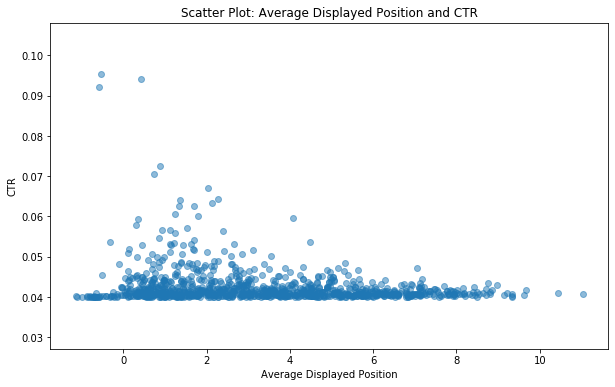

In [245]:
fig = plt.figure(figsize=[10,6])
plt.scatter(clicked1000.avg_displayed_pos,clicked1000.ctr, alpha=0.5)
plt.title('Scatter Plot: Average Displayed Position and CTR')
plt.xlabel('Average Displayed Position')
plt.ylabel('CTR')


In [242]:
from scipy.stats.stats import pearsonr
corr = pearsonr(clicked1000.avg_displayed_pos,clicked1000.ctr)
corr

(-0.2067107330081197, 4.02083460885282e-11)

Average displayed position and ctr are largely uncorrelated with each other with statistical significance. The displayed position of each item does not largely affect the item's performance.